In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree

In [40]:
df= pd.read_csv('/Users/aimaldastagirzada/Downloads/conversion_data.csv')

In [41]:
df

Unnamed: 0  visitor_id visitor_location marketing_channel gender   
0              0           1    North America           youtube      M  \
1              1           2    South America           organic      F   
2              2           3        Australia         instagram      M   
3              3           4    North America          facebook      M   
4              4           5             Asia         instagram      F   
...          ...         ...              ...               ...    ...   
1995        1995        1996           Europe           organic      F   
1996        1996        1997    South America            google      M   
1997        1997        1998             Asia          facebook      M   
1998        1998        1999    South America           youtube      F   
1999        1999        2000    North America         instagram      F   

      product_views_Mon  product_views_Tue  product_views_Wed   
0                     4                  5                  2  \
1                     2                  5                  0   
2                     3                  4                  0   
3                     1                  0                  0   
4                     1                  5                  2   
...                 ...                ...                ...   
1995                  3                  0                  0   
1996                  1                  2                  0   
1997                  2                  3                  0   
1998                  2                  2                  2   
1999                  2                  1                  1   

      product_views_Thu  product_views_Fri  ...  time_on_site_Tue   
0                     1                  2  ...                33  \
1                     1                  5  ...                28   
2                    -3                  5  ...                34   
3                     5                  0  ...                26   
4                     2                  3  ...                54   
...                 ...                ...  ...               ...   
1995                  4                  2  ...                22   
1996                  4                  1  ...                54   
1997                  0                  8  ...                32   
1998                  5                  5  ...                21   
1999                  5                  1  ...                21   

      time_on_site_Wed  time_on_site_Thu  time_on_site_Fri  pages_visited_Mon   
0                   23                46                57                  4  \
1                   39                24                51                  5   
2                   22                34                31                  1   
3                   43                22                39                  3   
4                   30                47                57                  6   
...                ...               ...               ...                ...   
1995                51                44                29                  5   
1996                33                59                38                  1   
1997                30                48                38                  2   
1998                51                41                56                  6   
1999                45                59                21                  4   

      pages_visited_Tue  pages_visited_Wed  pages_visited_Thu   
0                     5                  5                  4  \
1                     6                  7                  6   
2                     3                  3                  2   
3                     4                  7                  7   
4                     6                  5                  2   
...                 ...                ...                ...   
1995                  1                  5                  7   
1996          

In [42]:
df.drop(columns='Unnamed: 0', axis=0, inplace=True)

In [43]:
df

visitor_id visitor_location marketing_channel gender  product_views_Mon   
0              1    North America           youtube      M                  4  \
1              2    South America           organic      F                  2   
2              3        Australia         instagram      M                  3   
3              4    North America          facebook      M                  1   
4              5             Asia         instagram      F                  1   
...          ...              ...               ...    ...                ...   
1995        1996           Europe           organic      F                  3   
1996        1997    South America            google      M                  1   
1997        1998             Asia          facebook      M                  2   
1998        1999    South America           youtube      F                  2   
1999        2000    North America         instagram      F                  2   

      product_views_Tue  product_views_Wed  product_views_Thu   
0                     5                  2                  1  \
1                     5                  0                  1   
2                     4                  0                 -3   
3                     0                  0                  5   
4                     5                  2                  2   
...                 ...                ...                ...   
1995                  0                  0                  4   
1996                  2                  0                  4   
1997                  3                  0                  0   
1998                  2                  2                  5   
1999                  1                  1                  5   

      product_views_Fri  avg_rating_Mon  ...  time_on_site_Tue   
0                     2            3.90  ...                33  \
1                     5            1.31  ...                28   
2                     5            3.26  ...                34   
3                     0            2.66  ...                26   
4                     3            2.76  ...                54   
...                 ...             ...  ...               ...   
1995                  2            4.80  ...                22   
1996                  1            1.34  ...                54   
1997                  8            2.56  ...                32   
1998                  5            4.49  ...                21   
1999                  1            3.95  ...                21   

      time_on_site_Wed  time_on_site_Thu  time_on_site_Fri  pages_visited_Mon   
0                   23                46                57                  4  \
1                   39                24                51                  5   
2                   22                34                31                  1   
3                   43                22                39                  3   
4                   30                47                57                  6   
...                ...               ...               ...                ...   
1995                51                44                29                  5   
1996                33                59                38                  1   
1997                30                48                38                  2   
1998                51                41                56                  6   
1999                45                59                21                  4   

      pages_visited_Tue  pages_visited_Wed  pages_visited_Thu   
0                     5                  5                  4  \
1                     6                  7                  6   
2                     3                  3                  2   
3                     4                  7                  7   
4                     6                  5                  2   
...                 ...                ...                ...   
1995                  1        

In [44]:
df.isnull().sum()

visitor_id           0
visitor_location     0
marketing_channel    0
gender               0
product_views_Mon    0
product_views_Tue    0
product_views_Wed    0
product_views_Thu    0
product_views_Fri    0
avg_rating_Mon       0
avg_rating_Tue       0
avg_rating_Wed       0
avg_rating_Thu       0
avg_rating_Fri       0
avg_price_Mon        0
avg_price_Tue        0
avg_price_Wed        0
avg_price_Thu        0
avg_price_Fri        0
time_on_site_Mon     0
time_on_site_Tue     0
time_on_site_Wed     0
time_on_site_Thu     0
time_on_site_Fri     0
pages_visited_Mon    0
pages_visited_Tue    0
pages_visited_Wed    0
pages_visited_Thu    0
pages_visited_Fri    0
converted_Fri        0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   visitor_location   2000 non-null   object 
 2   marketing_channel  2000 non-null   object 
 3   gender             2000 non-null   object 
 4   product_views_Mon  2000 non-null   int64  
 5   product_views_Tue  2000 non-null   int64  
 6   product_views_Wed  2000 non-null   int64  
 7   product_views_Thu  2000 non-null   int64  
 8   product_views_Fri  2000 non-null   int64  
 9   avg_rating_Mon     2000 non-null   float64
 10  avg_rating_Tue     2000 non-null   float64
 11  avg_rating_Wed     2000 non-null   float64
 12  avg_rating_Thu     2000 non-null   float64
 13  avg_rating_Fri     2000 non-null   float64
 14  avg_price_Mon      2000 non-null   float64
 15  avg_price_Tue      2000 non-null   float64
 16  avg_price_Wed      2000 

In [46]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [47]:
df.describe(include='all')

visitor_id visitor_location marketing_channel gender   
count   2000.000000             2000              2000   2000  \
unique          NaN                5                 5      2   
top             NaN    South America         instagram      F   
freq            NaN              433               431   1093   
mean    1000.500000              NaN               NaN    NaN   
std      577.494589              NaN               NaN    NaN   
min        1.000000              NaN               NaN    NaN   
25%      500.750000              NaN               NaN    NaN   
50%     1000.500000              NaN               NaN    NaN   
75%     1500.250000              NaN               NaN    NaN   
max     2000.000000              NaN               NaN    NaN   

        product_views_Mon  product_views_Tue  product_views_Wed   
count         2000.000000        2000.000000        2000.000000  \
unique                NaN                NaN                NaN   
top                   NaN                NaN                NaN   
freq                  NaN                NaN                NaN   
mean             2.541500           2.440500           2.441000   
std              1.704914           1.715206           2.343345   
min              0.000000           0.000000           0.000000   
25%              1.000000           1.000000           0.000000   
50%              3.000000           2.000000           2.000000   
75%              4.000000           4.000000           4.000000   
max              5.000000           5.000000           9.000000   

        product_views_Thu  product_views_Fri  avg_rating_Mon  ...   
count         2000.000000        2000.000000     2000.000000  ...  \
unique                NaN                NaN             NaN  ...   
top                   NaN                NaN             NaN  ...   
freq                  NaN                NaN             NaN  ...   
mean             2.256500           2.354000        3.023990  ...   
std              2.370974           2.335682        1.151037  ...   
min             -4.000000          -3.000000        1.000000  ...   
25%              0.000000           0.000000        2.017500  ...   
50%              2.000000           2.000000        3.055000  ...   
75%              5.000000           5.000000        4.022500  ...   
max              8.000000           8.000000        5.000000  ...   

        time_on_site_Tue  time_on_site_Wed  time_on_site_Thu   
count        2000.000000       2000.000000       2000.000000  \
unique               NaN               NaN               NaN   
top                  NaN               NaN               NaN   
freq                 NaN               NaN               NaN   
mean           39.776500         40.155500         40.417000   
std            11.855624         11.757399         11.892638   
min            20.000000         20.000000         20.000000   
25%            29.000000         30.000000         30.000000   
50%            40.000000         40.000000         40.500000   
75%            50.000000         50.000000         51.000000   
max            60.000000         60.000000         60.000000   

        time_on_site_Fri  pages_visited_Mon  pages_visited_Tue   
count        2000.000000        2000.000000        2000.000000  \
unique               NaN                NaN                NaN   
top                  NaN                NaN                NaN   
freq                 NaN                NaN                NaN   
mean           40.028500           3.946000           4.071000   
std            11.664207           2.010001           2.012209   
min            20.000000           1.000000           1.000000   
25%            30.000000           2.000000           2.000000   
50%            40.000000           4.000000           4.000000   
75%            50.000000           6.000000           6.000000   
max            60.000000           7.000000           7.000000   

        pages_visited_Wed  pages

In [48]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

**Reducing Dimensionalaity**

In [49]:
df['average_product_views']= (df['product_views_Mon'] +df['product_views_Tue'] +df['product_views_Wed']+ df['product_views_Thu']+df['product_views_Fri'])/5
df['average_rating']= (df['avg_rating_Mon'] + df['avg_rating_Tue']+ df['avg_rating_Wed']+df['avg_rating_Thu']+ df['avg_rating_Fri'])/5
df['average_price']= (df['avg_price_Mon']+ df['avg_price_Tue'] +df ['avg_price_Wed'] + df['avg_price_Thu'] +df['avg_price_Fri'])/5
df['avg_time_spent']= (df['time_on_site_Mon'] +df['time_on_site_Tue'] +df['time_on_site_Wed']+df['time_on_site_Thu'] +df['time_on_site_Fri']/5)
df['avg_pages_visited']= (df['pages_visited_Mon'] +df ['pages_visited_Tue']+df['pages_visited_Wed']+df['pages_visited_Thu']+ df['pages_visited_Fri']/5)



In [50]:
df

visitor_id visitor_location marketing_channel gender  product_views_Mon   
0              1    North America           youtube      M                  4  \
1              2    South America           organic      F                  2   
2              3        Australia         instagram      M                  3   
3              4    North America          facebook      M                  1   
4              5             Asia         instagram      F                  1   
...          ...              ...               ...    ...                ...   
1995        1996           Europe           organic      F                  3   
1996        1997    South America            google      M                  1   
1997        1998             Asia          facebook      M                  2   
1998        1999    South America           youtube      F                  2   
1999        2000    North America         instagram      F                  2   

      product_views_Tue  product_views_Wed  product_views_Thu   
0                     5                  2                  1  \
1                     5                  0                  1   
2                     4                  0                 -3   
3                     0                  0                  5   
4                     5                  2                  2   
...                 ...                ...                ...   
1995                  0                  0                  4   
1996                  2                  0                  4   
1997                  3                  0                  0   
1998                  2                  2                  5   
1999                  1                  1                  5   

      product_views_Fri  avg_rating_Mon  ...  pages_visited_Tue   
0                     2            3.90  ...                  5  \
1                     5            1.31  ...                  6   
2                     5            3.26  ...                  3   
3                     0            2.66  ...                  4   
4                     3            2.76  ...                  6   
...                 ...             ...  ...                ...   
1995                  2            4.80  ...                  1   
1996                  1            1.34  ...                  6   
1997                  8            2.56  ...                  1   
1998                  5            4.49  ...                  4   
1999                  1            3.95  ...                  5   

      pages_visited_Wed  pages_visited_Thu  pages_visited_Fri  converted_Fri   
0                     5                  4                  6              1  \
1                     7                  6                  2              0   
2                     3                  2                  3              1   
3                     7                  7                  1              0   
4                     5                  2                  4              1   
...                 ...                ...                ...            ...   
1995                  5                  7                  7              0   
1996                  6                  7                  6              0   
1997                  7                  6                  4              0   
1998                  2                  2                  3              1   
1999                  7                  3                  1              1   

      average_product_views  average_rating  average_price  avg_time_spent   
0                       2.8           3.134         54.738           170.4  \
1                       2.6           2.068         71.432           125.2   
2                       1.8           3.666         64.358           119.2   
3                       1.2           3.300         56.048           154.8   
4                       2.6           2.364         46.442           177.4   
...               

**EDA**

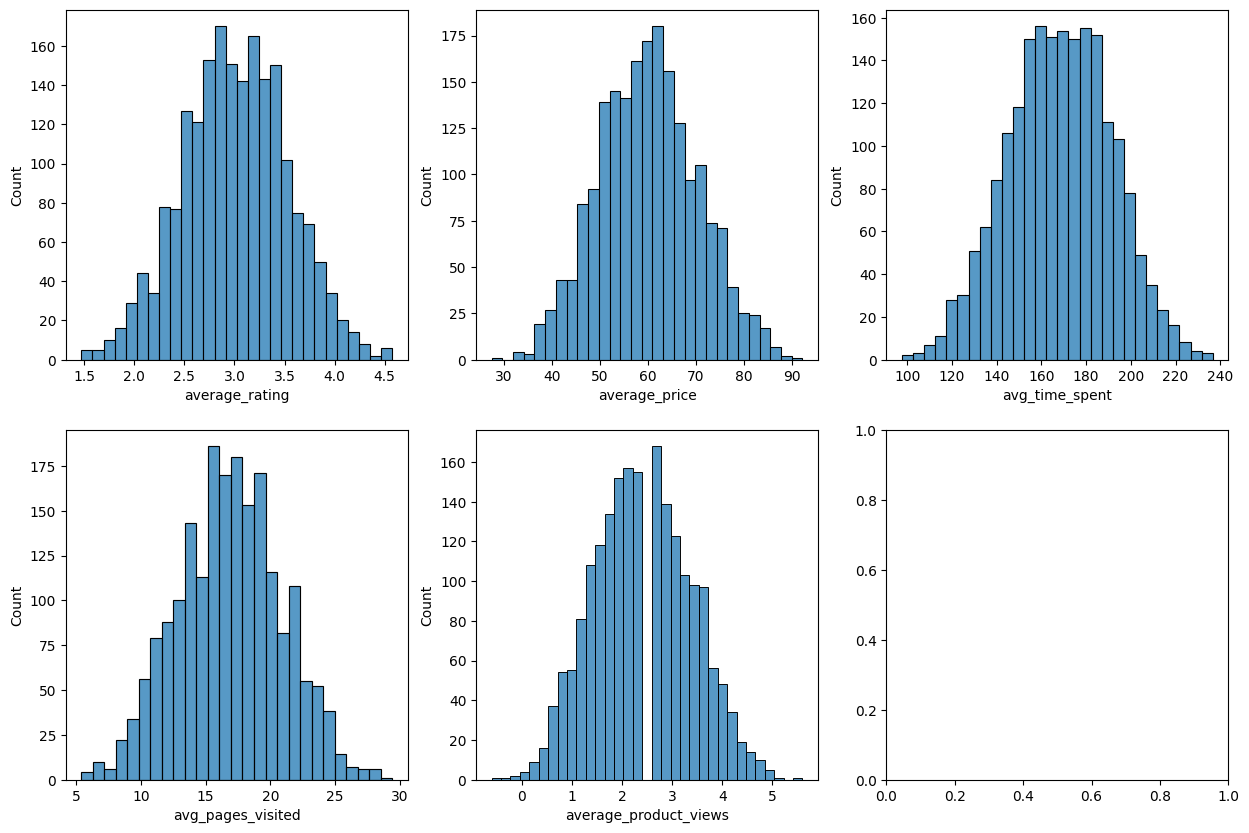

In [54]:
fig, axs=plt.subplots(2,3, figsize=(15,10))
plt1= sns.histplot(df['average_rating'], ax=axs[0][0])
plt2=sns.histplot(df['average_price'], ax=axs[0][1])
plt3=sns.histplot(df['avg_time_spent'], ax=axs[0][2])
plt4=sns.histplot(df['avg_pages_visited'], ax=axs[1][0])
plt5=sns.histplot(df['average_product_views'], ax=axs[1][1])


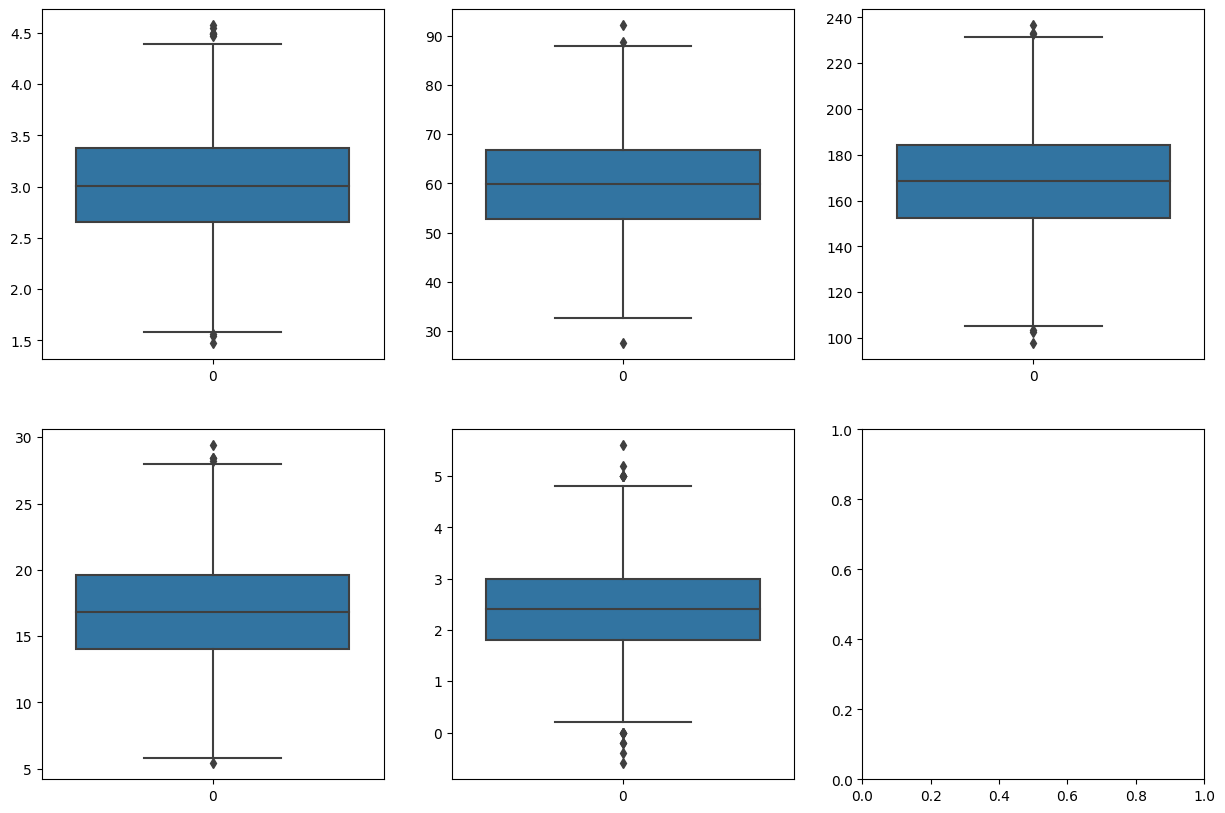

In [55]:
fig, axs=plt.subplots(2,3, figsize=(15,10))
plt1= sns.boxplot(df['average_rating'], ax=axs[0][0])
plt2=sns.boxplot(df['average_price'], ax=axs[0][1])
plt3=sns.boxplot(df['avg_time_spent'], ax=axs[0][2])
plt4=sns.boxplot(df['avg_pages_visited'], ax=axs[1][0])
plt5=sns.boxplot(df['average_product_views'], ax=axs[1][1])

In [56]:
numerical_cols = ['average_rating',
       'average_price', 'avg_time_spent', 'avg_pages_visited',
       'average_product_views']
categorical_cols = ['visitor_location', 'marketing_channel', 'gender','converted_Fri']

In [57]:
for column in numerical_cols:
    skewness_values = []
    s = skew(df[column])
    k = kurtosis(df[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

average_rating: skewness = -0.01955180276451296, kurtosis = -0.21508188709720866
average_price: skewness = 0.11196913330273442, kurtosis = -0.2722925608746758
avg_time_spent: skewness = -0.04615344169117802, kurtosis = -0.31420746537968736
avg_pages_visited: skewness = 0.020406625164329822, kurtosis = -0.2880968708425953
average_product_views: skewness = 0.08152384170156853, kurtosis = -0.31706565166685685


In [58]:
df2 = df.copy()

In [59]:
if abs(s) > 1:
    df2[column] = df2[column].apply(lambda x: np.log(x + 1))
z_scores = zscore(df2[numerical_cols])
threshold = 3
df2 = df2[(np.abs(z_scores) < threshold).all(axis=1)]

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 0 to 1999
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   visitor_id             1994 non-null   int64  
 1   visitor_location       1994 non-null   object 
 2   marketing_channel      1994 non-null   object 
 3   gender                 1994 non-null   object 
 4   product_views_Mon      1994 non-null   int64  
 5   product_views_Tue      1994 non-null   int64  
 6   product_views_Wed      1994 non-null   int64  
 7   product_views_Thu      1994 non-null   int64  
 8   product_views_Fri      1994 non-null   int64  
 9   avg_rating_Mon         1994 non-null   float64
 10  avg_rating_Tue         1994 non-null   float64
 11  avg_rating_Wed         1994 non-null   float64
 12  avg_rating_Thu         1994 non-null   float64
 13  avg_rating_Fri         1994 non-null   float64
 14  avg_price_Mon          1994 non-null   float64
 15  avg_price

In [63]:
if abs(s) > 1:
    df[column] = df[column].apply(lambda x: np.log(x + 1))
z_scores = zscore(df[numerical_cols])
threshold = 3
df = df[(np.abs(z_scores) < threshold).all(axis=1)]

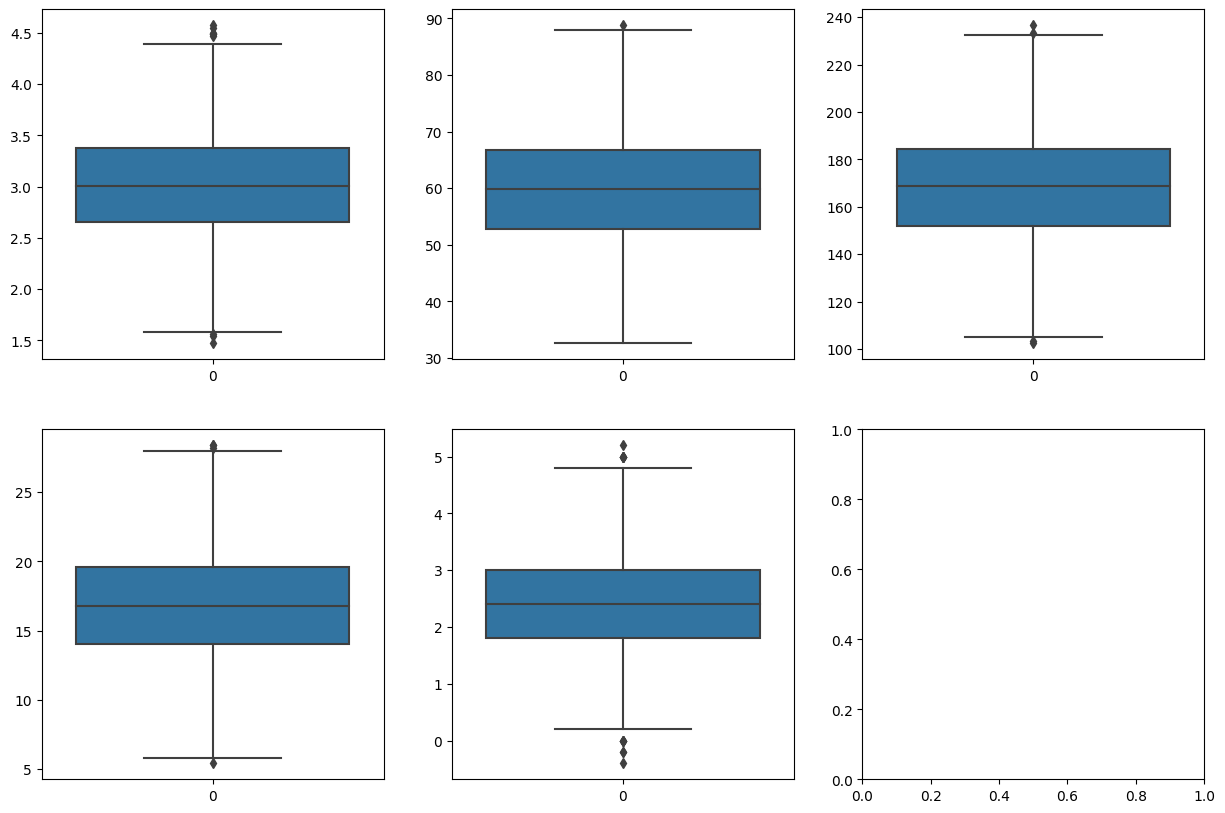

In [64]:
fig, axs=plt.subplots(2,3, figsize=(15,10))
plt1= sns.boxplot(df2['average_rating'], ax=axs[0][0])
plt2=sns.boxplot(df2['average_price'], ax=axs[0][1])
plt3=sns.boxplot(df2['avg_time_spent'], ax=axs[0][2])
plt4=sns.boxplot(df2['avg_pages_visited'], ax=axs[1][0])
plt5=sns.boxplot(df2['average_product_views'], ax=axs[1][1])

**Statistical testing**

In [65]:
df

visitor_id visitor_location marketing_channel gender  product_views_Mon   
0              1    North America           youtube      M                  4  \
1              2    South America           organic      F                  2   
2              3        Australia         instagram      M                  3   
3              4    North America          facebook      M                  1   
4              5             Asia         instagram      F                  1   
...          ...              ...               ...    ...                ...   
1995        1996           Europe           organic      F                  3   
1996        1997    South America            google      M                  1   
1997        1998             Asia          facebook      M                  2   
1998        1999    South America           youtube      F                  2   
1999        2000    North America         instagram      F                  2   

      product_views_Tue  product_views_Wed  product_views_Thu   
0                     5                  2                  1  \
1                     5                  0                  1   
2                     4                  0                 -3   
3                     0                  0                  5   
4                     5                  2                  2   
...                 ...                ...                ...   
1995                  0                  0                  4   
1996                  2                  0                  4   
1997                  3                  0                  0   
1998                  2                  2                  5   
1999                  1                  1                  5   

      product_views_Fri  avg_rating_Mon  ...  pages_visited_Tue   
0                     2            3.90  ...                  5  \
1                     5            1.31  ...                  6   
2                     5            3.26  ...                  3   
3                     0            2.66  ...                  4   
4                     3            2.76  ...                  6   
...                 ...             ...  ...                ...   
1995                  2            4.80  ...                  1   
1996                  1            1.34  ...                  6   
1997                  8            2.56  ...                  1   
1998                  5            4.49  ...                  4   
1999                  1            3.95  ...                  5   

      pages_visited_Wed  pages_visited_Thu  pages_visited_Fri  converted_Fri   
0                     5                  4                  6              1  \
1                     7                  6                  2              0   
2                     3                  2                  3              1   
3                     7                  7                  1              0   
4                     5                  2                  4              1   
...                 ...                ...                ...            ...   
1995                  5                  7                  7              0   
1996                  6                  7                  6              0   
1997                  7                  6                  4              0   
1998                  2                  2                  3              1   
1999                  7                  3                  1              1   

      average_product_views  average_rating  average_price  avg_time_spent   
0                       2.8           3.134         54.738           170.4  \
1                       2.6           2.068         71.432           125.2   
2                       1.8           3.666         64.358           119.2   
3                       1.2           3.300         56.048           154.8   
4                       2.6           2.364         46.442           177.4   
...               

In [66]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri',
       'average_product_views', 'average_rating', 'average_price',
       'avg_time_spent', 'avg_pages_visited'],
      dtype='object')

In [67]:
df.groupby('visitor_location')[['average_product_views', 'average_rating', 'average_price','avg_time_spent', 'avg_pages_visited']].mean()

average_product_views  average_rating  average_price   
visitor_location                                                         
Asia                           2.386957        3.023962      60.254082  \
Australia                      2.367742        2.993608      60.210893   
Europe                         2.463874        3.000455      60.234251   
North America                  2.333985        3.009242      59.732592   
South America                  2.478241        3.022495      59.967653   

                  avg_time_spent  avg_pages_visited  
visitor_location                                     
Asia                  167.341848          16.574457  
Australia             168.115633          16.674442  
Europe                166.674346          16.635079  
North America         169.201956          17.342298  
South America         169.202315          16.938889

In [72]:
loc1= df[df['visitor_location'] == 'Asia']['average_product_views']
loc2= df[df['visitor_location'] == 'Australia']['average_product_views']
loc3= df[df['visitor_location'] == 'Europe']['average_product_views']
loc4= df[df['visitor_location']  == 'North America']['average_product_views']
loc5= df[df['visitor_location'] == 'South America']['average_product_views']

p_val= stats.f_oneway(loc1,loc2,loc3,loc4,loc5)
print(p_val)

F_onewayResult(statistic=1.7136431567309003, pvalue=0.14424102362708585)


In [74]:
loc1= df[df['visitor_location'] == 'Asia']['average_rating']
loc2= df[df['visitor_location'] == 'Australia']['average_rating']
loc3= df[df['visitor_location'] == 'Europe']['average_rating']
loc4= df[df['visitor_location'] == 'North America']['average_rating']
loc5= df[df['visitor_location'] == 'South America']['average_rating']

p_val= stats.f_oneway(loc1,loc2,loc3,loc4,loc5)
print(p_val)

F_onewayResult(statistic=0.2573664993289223, pvalue=0.9052569443334382)


In [75]:
loc_1 = df[df['visitor_location'] == 'Asia']['average_price']
loc_2 = df[df['visitor_location'] == 'Australia']['average_price']
loc_3 = df[df['visitor_location'] == 'Europe']['average_price']
loc_4 = df[df['visitor_location'] == 'North America']['average_price']
loc_5 = df[df['visitor_location'] == 'South America']['average_price']

p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=0.19741711659250724, pvalue=0.9397958182161847)


In [76]:
loc_1 = df[df['visitor_location'] == 'Asia']['avg_time_spent']
loc_2 = df[df['visitor_location'] == 'Australia']['avg_time_spent']
loc_3 = df[df['visitor_location'] == 'Europe']['avg_time_spent']
loc_4 = df[df['visitor_location'] == 'North America']['avg_time_spent']
loc_5 = df[df['visitor_location'] == 'South America']['avg_time_spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=0.9311404108918592, pvalue=0.4447969559462379)


In [77]:
loc_1 = df[df['visitor_location'] == 'Asia']['avg_pages_visited']
loc_2 = df[df['visitor_location'] == 'Australia']['avg_pages_visited']
loc_3 = df[df['visitor_location'] == 'Europe']['avg_pages_visited']
loc_4 = df[df['visitor_location'] == 'North America']['avg_pages_visited']
loc_5 = df[df['visitor_location'] == 'South America']['avg_pages_visited']

p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=2.513548693326465, pvalue=0.03986037340512217)


In [79]:
df.groupby('marketing_channel')[['average_product_views', 'average_rating', 'average_price','avg_time_spent', 'avg_pages_visited']].mean()

average_product_views  average_rating  average_price   
marketing_channel                                                         
facebook                        2.414758        3.024534      59.737074  \
google                          2.392481        2.968667      60.243158   
instagram                       2.402797        3.035557      60.354783   
organic                         2.338272        3.023363      60.495551   
youtube                         2.493478        2.994723      59.451201   

                   avg_time_spent  avg_pages_visited  
marketing_channel                                     
facebook               168.597964          17.092112  
google                 168.590977          17.033584  
instagram              168.453147          16.837296  
organic                167.869136          16.545185  
youtube                167.176087          16.703261

In [81]:
m1= df[df['marketing_channel'] == 'facebook']['average_product_views']
m2= df[df['marketing_channel'] == 'google']['average_product_views']
m3= df[df['marketing_channel'] == 'instagram']['average_product_views']
m4= df[df['marketing_channel'] == 'organic']['average_product_views']
m5= df[df['marketing_channel'] == 'youtube']['average_product_views']

p_val=stats.f_oneway(m1,m2,m3,m4,m5)
print(p_val)


F_onewayResult(statistic=1.2833958956207665, pvalue=0.2742616159123885)


In [82]:
m1= df[df['marketing_channel'] == 'facebook']['average_rating']
m2= df[df['marketing_channel'] == 'google']['average_rating']
m3= df[df['marketing_channel'] == 'instagram']['average_rating']
m4= df[df['marketing_channel'] == 'organic']['average_rating']
m5= df[df['marketing_channel'] == 'youtube']['average_rating']

p_val=stats.f_oneway(m1,m2,m3,m4,m5)
print(p_val)

F_onewayResult(statistic=1.0978949133168485, pvalue=0.3559197853705485)


In [83]:
m1= df[df['marketing_channel'] == 'facebook']['average_price']
m2= df[df['marketing_channel'] == 'google']['average_price']
m3= df[df['marketing_channel'] == 'instagram']['average_price']
m4= df[df['marketing_channel'] == 'organic']['average_price']
m5= df[df['marketing_channel'] == 'youtube']['average_price']

p_val=stats.f_oneway(m1,m2,m3,m4,m5)
print(p_val)

F_onewayResult(statistic=0.7353643597420552, pvalue=0.5677872170038512)


In [84]:
m1= df[df['marketing_channel'] == 'facebook']['avg_time_spent']
m2= df[df['marketing_channel'] == 'google']['avg_time_spent']
m3= df[df['marketing_channel'] == 'instagram']['avg_time_spent']
m4= df[df['marketing_channel'] == 'organic']['avg_time_spent']
m5= df[df['marketing_channel'] == 'youtube']['avg_time_spent']

p_val=stats.f_oneway(m1,m2,m3,m4,m5)
print(p_val)

F_onewayResult(statistic=0.26771651350783826, pvalue=0.8988274823221156)


In [85]:
m1= df[df['marketing_channel'] == 'facebook']['avg_pages_visited']
m2= df[df['marketing_channel'] == 'google']['avg_pages_visited']
m3= df[df['marketing_channel'] == 'instagram']['avg_pages_visited']
m4= df[df['marketing_channel'] == 'organic']['avg_pages_visited']
m5= df[df['marketing_channel'] == 'youtube']['avg_pages_visited']

p_val=stats.f_oneway(m1,m2,m3,m4,m5)
print(p_val)

F_onewayResult(statistic=1.2815340286763495, pvalue=0.27499571126099415)


In [89]:
df.groupby('gender')[['average_product_views', 'average_rating', 'average_price','avg_time_spent', 'avg_pages_visited']].mean()

average_product_views  average_rating  average_price  avg_time_spent   
gender                                                                         
F                    2.480367        3.008385      59.991980      167.687890  \
M                    2.317920        3.011918      60.169662      168.718142   

        avg_pages_visited  
gender                     
F               16.838532  
M               16.847788

In [91]:
g1 = df[df['gender'] == 'F']['average_product_views']
g2 = df[df['gender'] == 'M']['average_product_views']

p_val= stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=14.088030027408605, pvalue=0.00017944655857560826)


In [92]:
g1 = df[df['gender'] == 'F']['average_rating']
g2 = df[df['gender'] == 'M']['average_rating']

p_val= stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=0.022497352483239225, pvalue=0.880786762754957)


In [93]:
g1 = df[df['gender'] == 'F']['average_price']
g2 = df[df['gender'] == 'M']['average_price']

p_val= stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=0.15069320780710793, pvalue=0.6979152628861631)


In [94]:
g1 = df[df['gender'] == 'F']['avg_time_spent']
g2 = df[df['gender'] == 'M']['avg_time_spent']

p_val= stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=0.9751662180913054, pvalue=0.32351503909829427)


In [95]:
g1 = df[df['gender'] == 'F']['avg_pages_visited']
g2 = df[df['gender'] == 'M']['avg_pages_visited']

p_val= stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=0.002643472628647392, pvalue=0.9590002165899872)


In [96]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri',
       'average_product_views', 'average_rating', 'average_price',
       'avg_time_spent', 'avg_pages_visited'],
      dtype='object')

In [98]:
all_numerical_columns=  ['product_views_Mon', 'product_views_Tue', 'product_views_Wed','product_views_Thu', 'product_views_Fri', 'avg_rating_Mon','avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri','avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu','avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue','time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri','pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed','pages_visited_Thu', 'pages_visited_Fri','average_product_views', 'average_rating', 'average_price','avg_time_spent', 'avg_pages_visited']

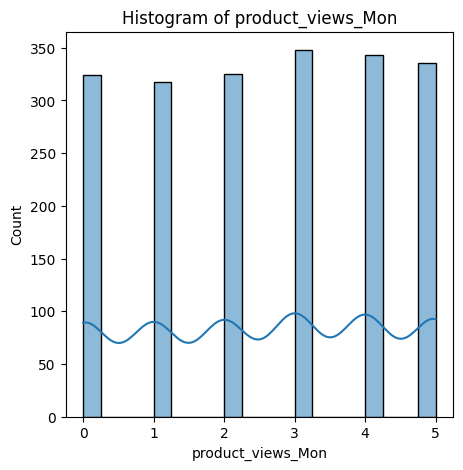

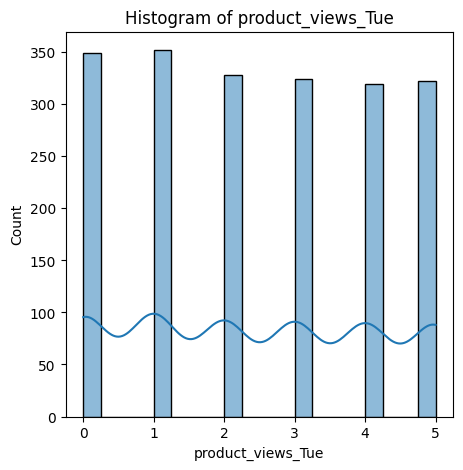

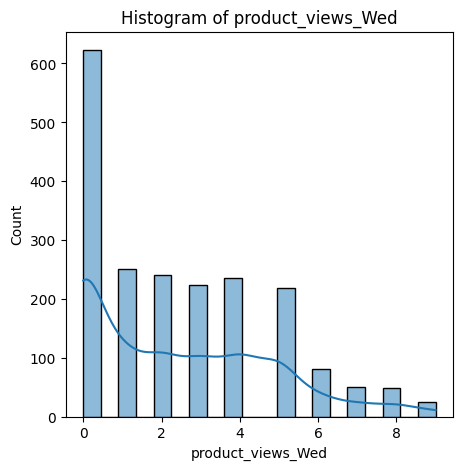

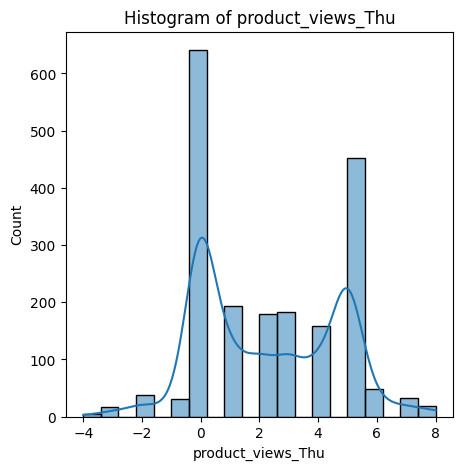

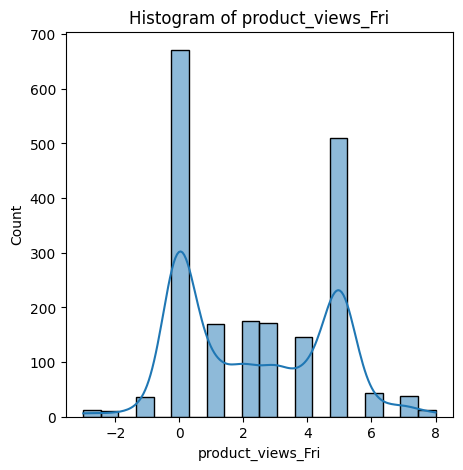

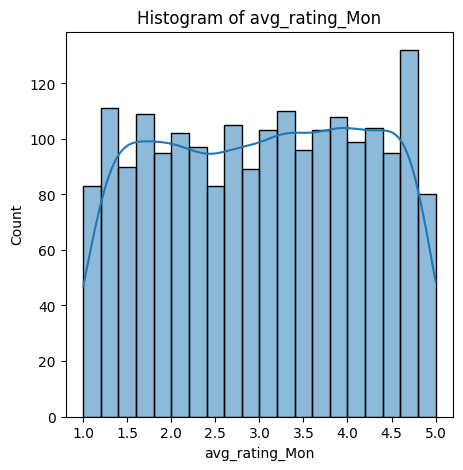

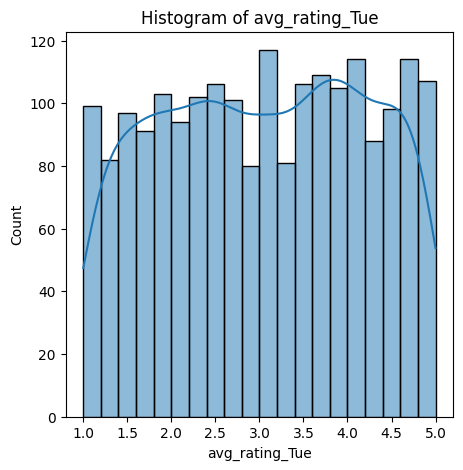

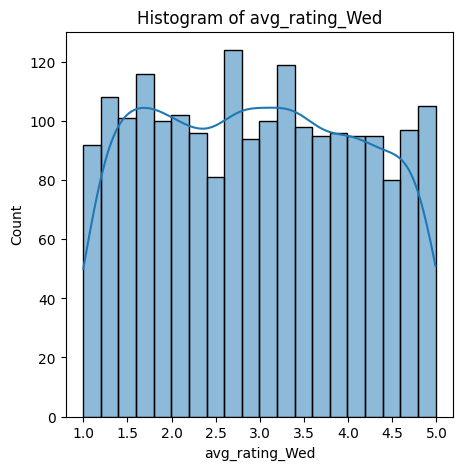

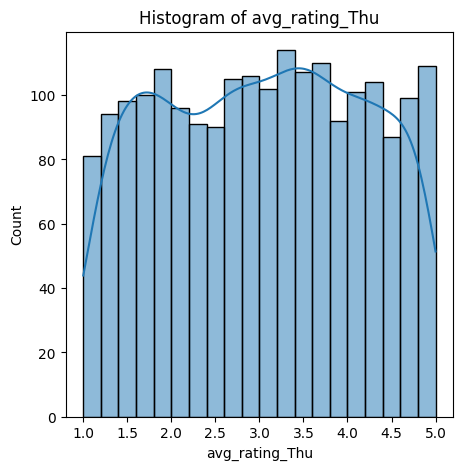

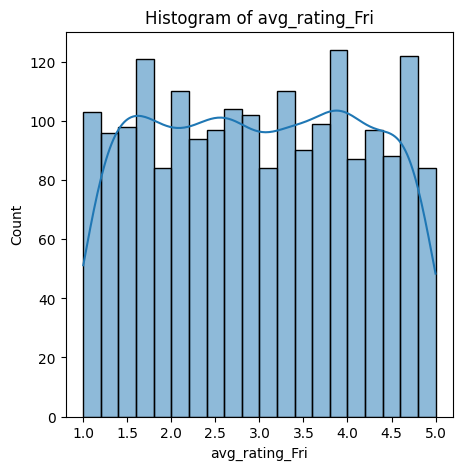

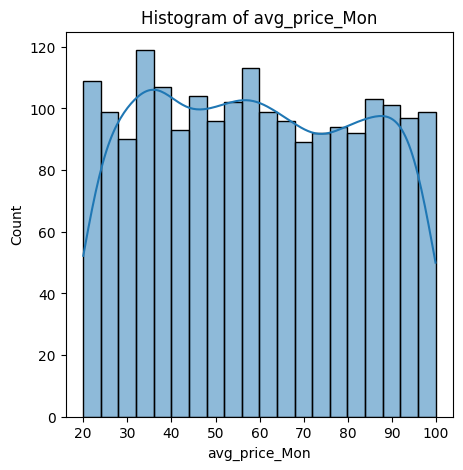

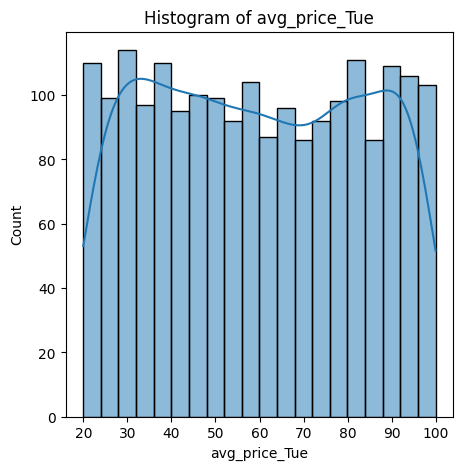

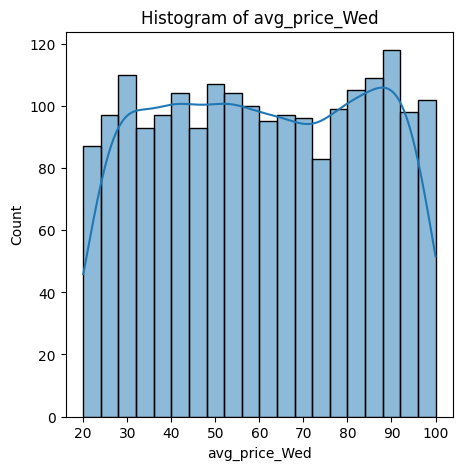

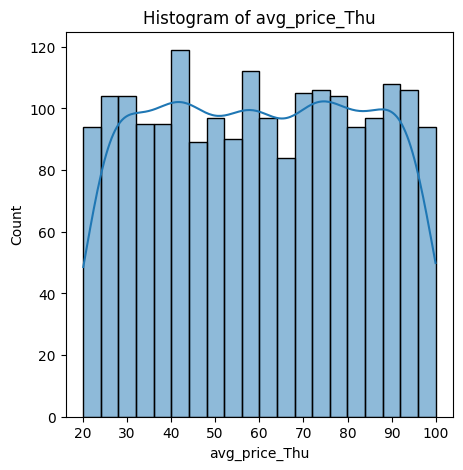

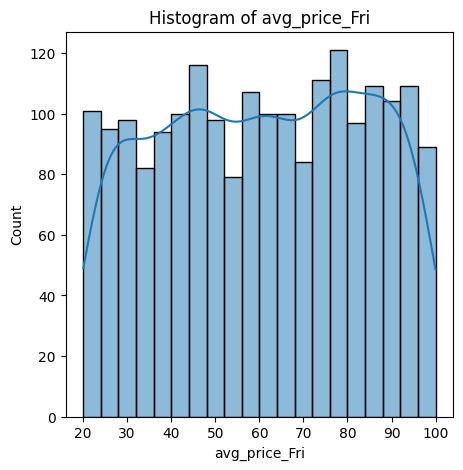

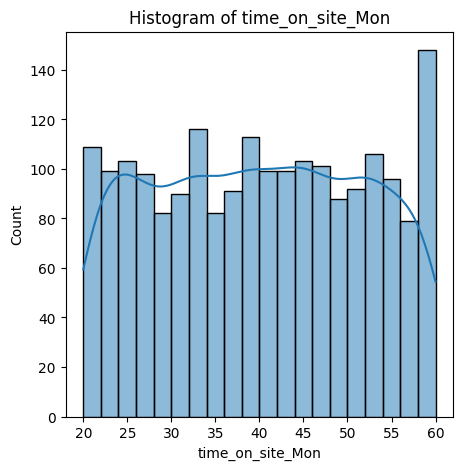

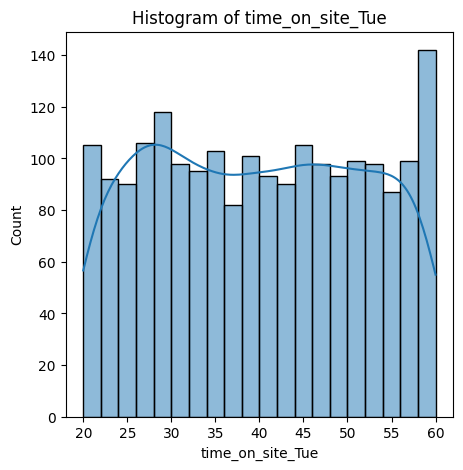

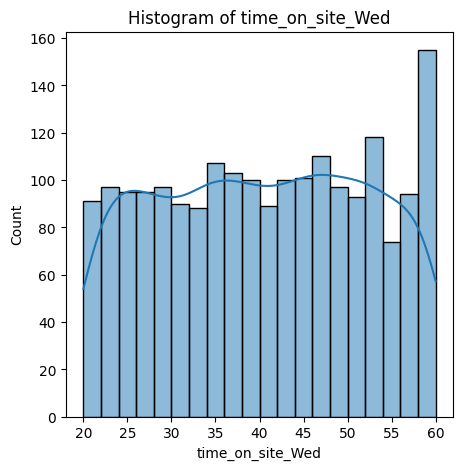

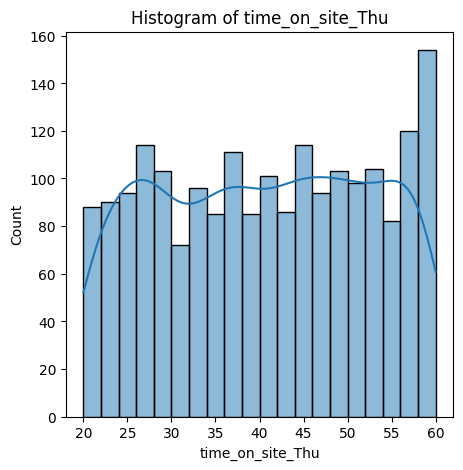

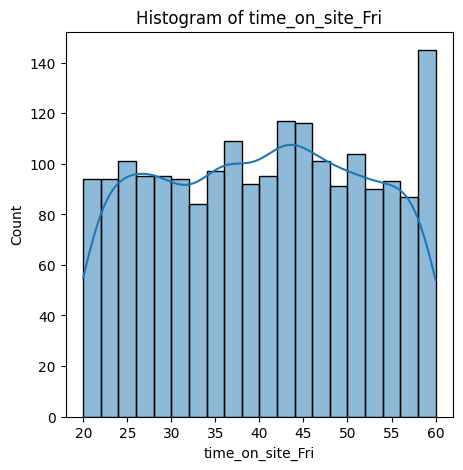

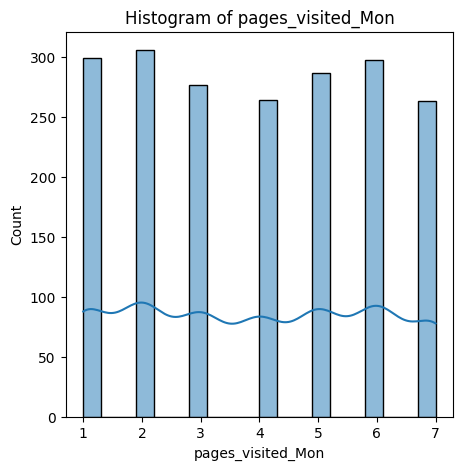

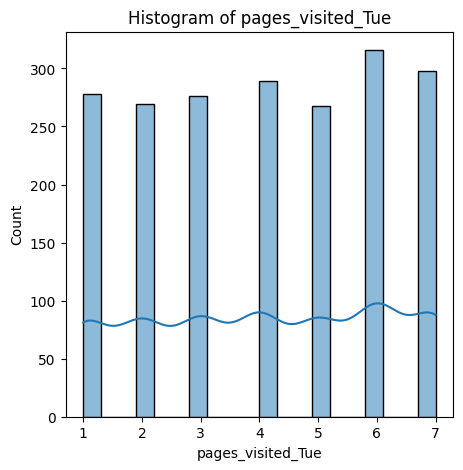

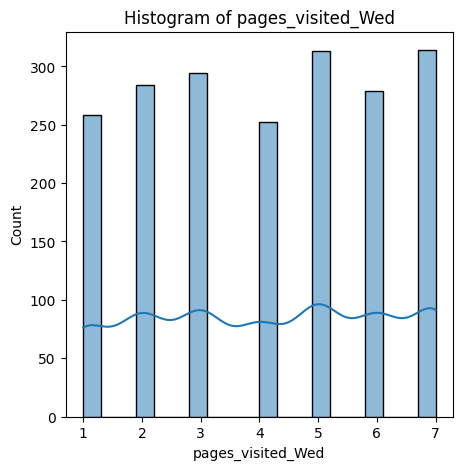

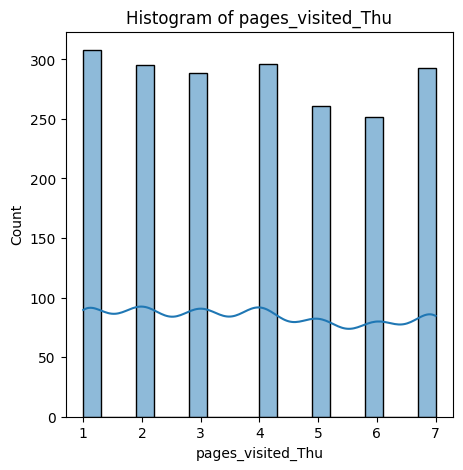

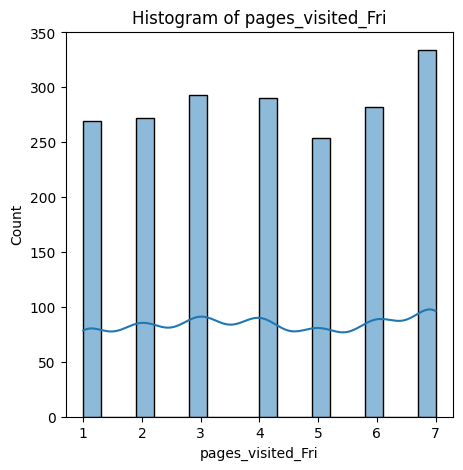

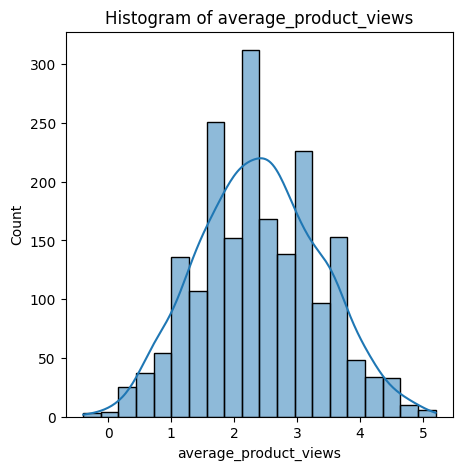

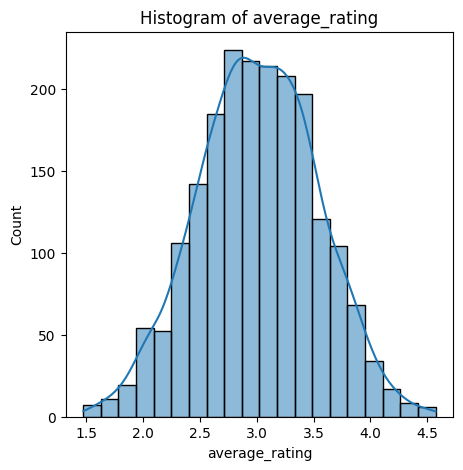

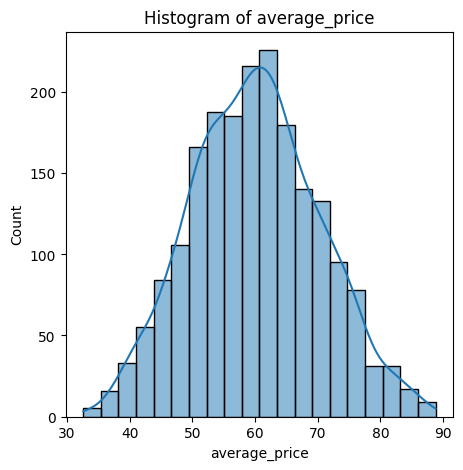

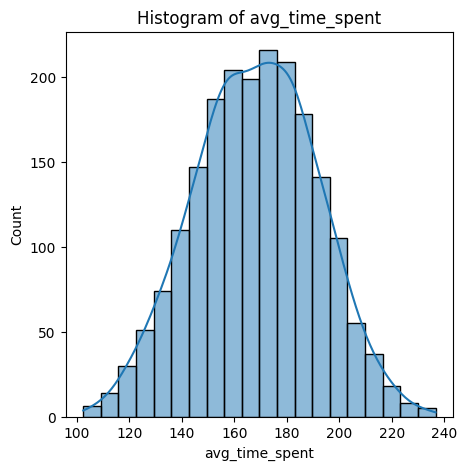

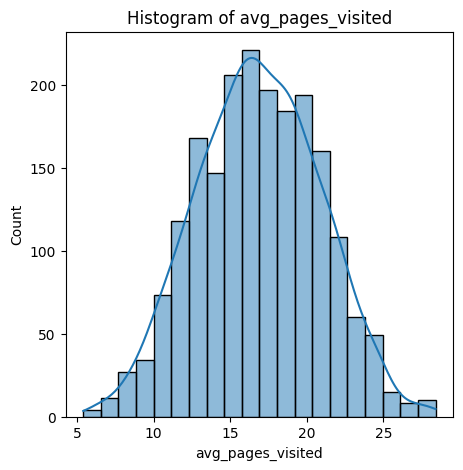

In [100]:
for column in all_numerical_columns:
    plt.figure(figsize=(5,5))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

**Initial Hypothese**

From our analysis we can that only product view is showing variability and other metrics are not showing any sign of change which could be important for further analysis 


In [101]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri',
       'average_product_views', 'average_rating', 'average_price',
       'avg_time_spent', 'avg_pages_visited'],
      dtype='object')

In [148]:
relevant_colums= ['visitor_location', 'marketing_channel', 'gender','product_views_Wed','product_views_Thu', 'product_views_Fri','average_product_views', 'average_rating', 'average_price','avg_time_spent', 'avg_pages_visited','converted_Fri']

In [149]:
new_df= df[relevant_colums]

In [150]:
new_df

visitor_location marketing_channel gender  product_views_Wed   
0       North America           youtube      M                  2  \
1       South America           organic      F                  0   
2           Australia         instagram      M                  0   
3       North America          facebook      M                  0   
4                Asia         instagram      F                  2   
...               ...               ...    ...                ...   
1995           Europe           organic      F                  0   
1996    South America            google      M                  0   
1997             Asia          facebook      M                  0   
1998    South America           youtube      F                  2   
1999    North America         instagram      F                  1   

      product_views_Thu  product_views_Fri  average_product_views   
0                     1                  2                    2.8  \
1                     1                  5                    2.6   
2                    -3                  5                    1.8   
3                     5                  0                    1.2   
4                     2                  3                    2.6   
...                 ...                ...                    ...   
1995                  4                  2                    1.8   
1996                  4                  1                    1.6   
1997                  0                  8                    2.6   
1998                  5                  5                    3.2   
1999                  5                  1                    2.0   

      average_rating  average_price  avg_time_spent  avg_pages_visited   
0              3.134         54.738           170.4               19.2  \
1              2.068         71.432           125.2               24.4   
2              3.666         64.358           119.2                9.6   
3              3.300         56.048           154.8               21.2   
4              2.364         46.442           177.4               19.8   
...              ...            ...             ...                ...   
1995           3.008         57.260           154.8               19.4   
1996           1.858         45.702           197.6               21.2   
1997           3.280         52.544           143.6               16.8   
1998           3.662         51.752           144.2               14.6   
1999           2.924         59.608           154.2               19.2   

      converted_Fri  
0                 1  
1                 0  
2                 1  
3                 0  
4                 1  
...             ...  
1995              0  
1996              0  
1997              0  
1998              1  
1999              1  

[1994 rows x 12 columns]

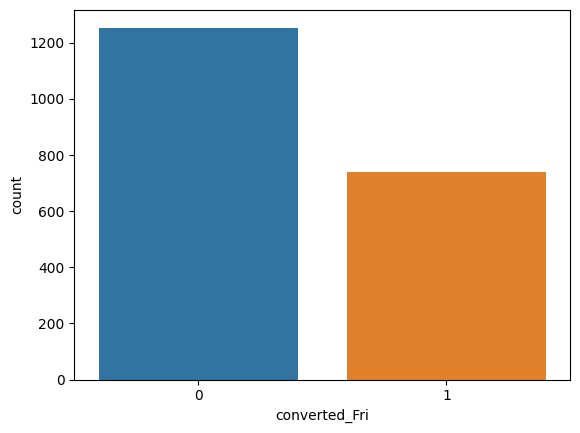

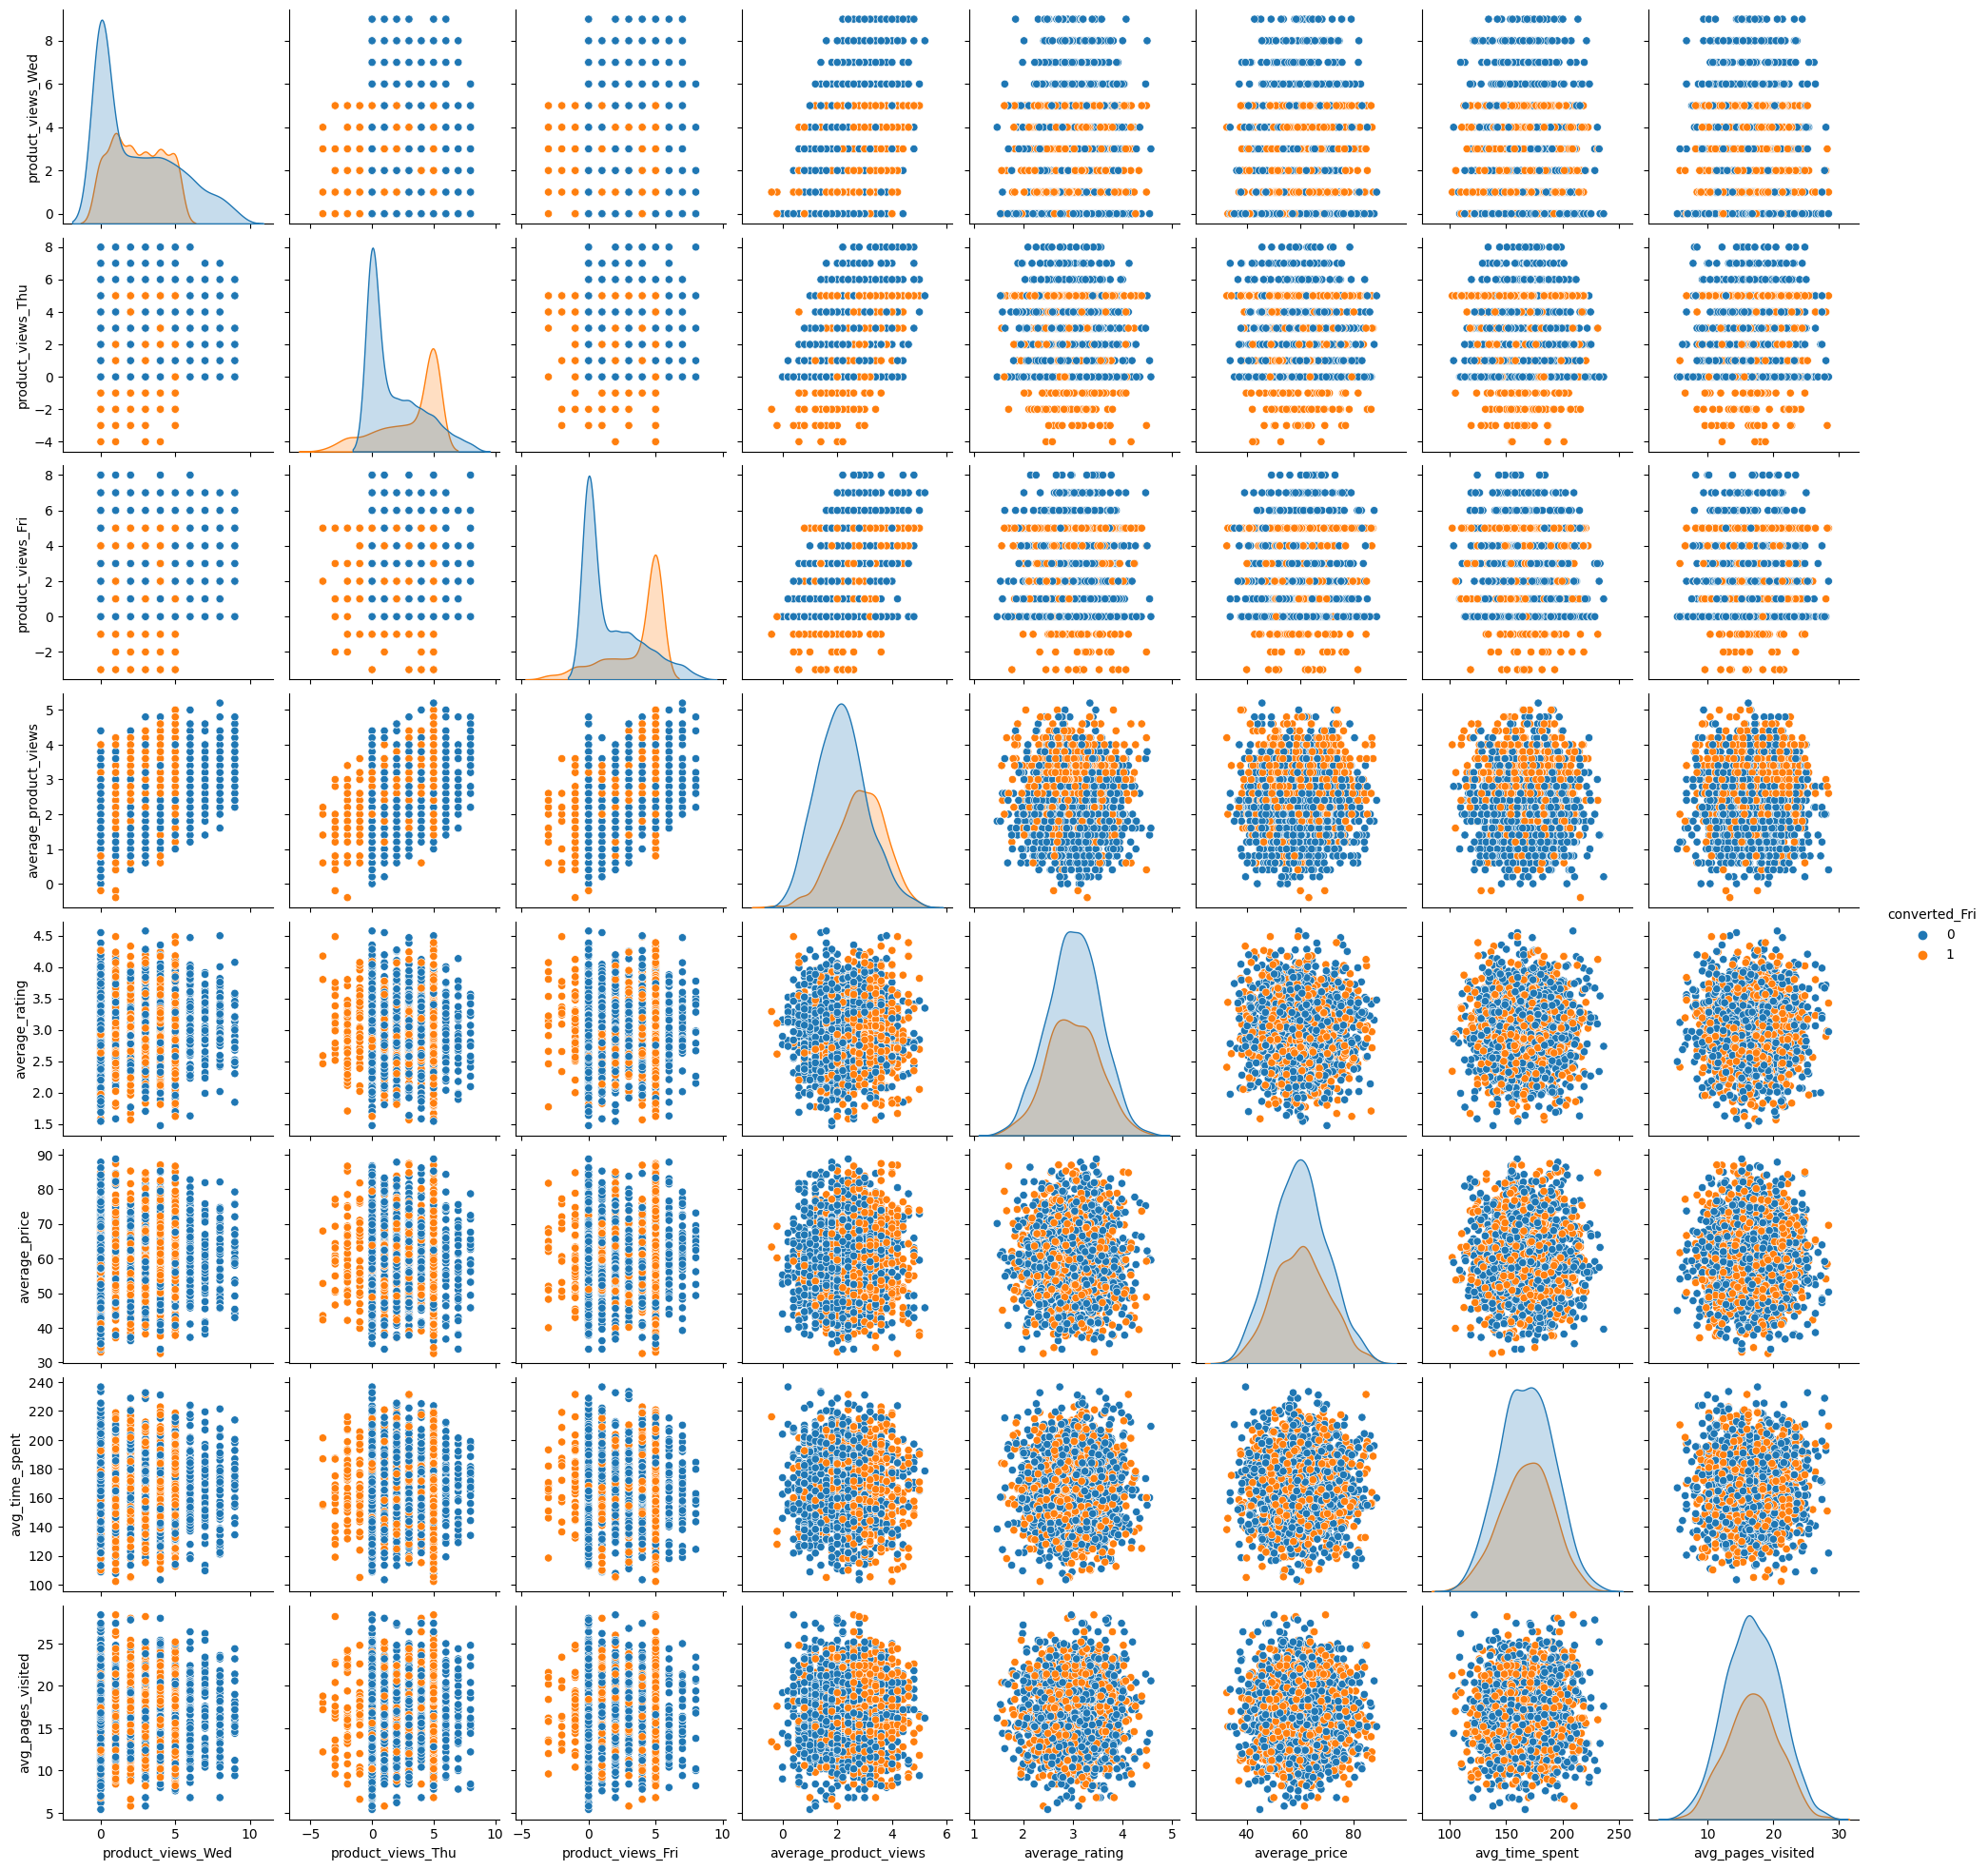

In [110]:
sns.countplot(x='converted_Fri', data=new_df)
plt.show()

sns.pairplot(new_df, hue='converted_Fri')
plt.show()

In [115]:
new_df

product_views_Wed  product_views_Thu  product_views_Fri   
0                     2                  1                  2  \
1                     0                  1                  5   
2                     0                 -3                  5   
3                     0                  5                  0   
4                     2                  2                  3   
...                 ...                ...                ...   
1995                  0                  4                  2   
1996                  0                  4                  1   
1997                  0                  0                  8   
1998                  2                  5                  5   
1999                  1                  5                  1   

      average_product_views  average_rating  average_price  avg_time_spent   
0                       2.8           3.134         54.738           170.4  \
1                       2.6           2.068         71.432           125.2   
2                       1.8           3.666         64.358           119.2   
3                       1.2           3.300         56.048           154.8   
4                       2.6           2.364         46.442           177.4   
...                     ...             ...            ...             ...   
1995                    1.8           3.008         57.260           154.8   
1996                    1.6           1.858         45.702           197.6   
1997                    2.6           3.280         52.544           143.6   
1998                    3.2           3.662         51.752           144.2   
1999                    2.0           2.924         59.608           154.2   

      avg_pages_visited  converted_Fri  
0                  19.2              1  
1                  24.4              0  
2                   9.6              1  
3                  21.2              0  
4                  19.8              1  
...                 ...            ...  
1995               19.4              0  
1996               21.2              0  
1997               16.8              0  
1998               14.6              1  
1999               19.2              1  

[1994 rows x 9 columns]

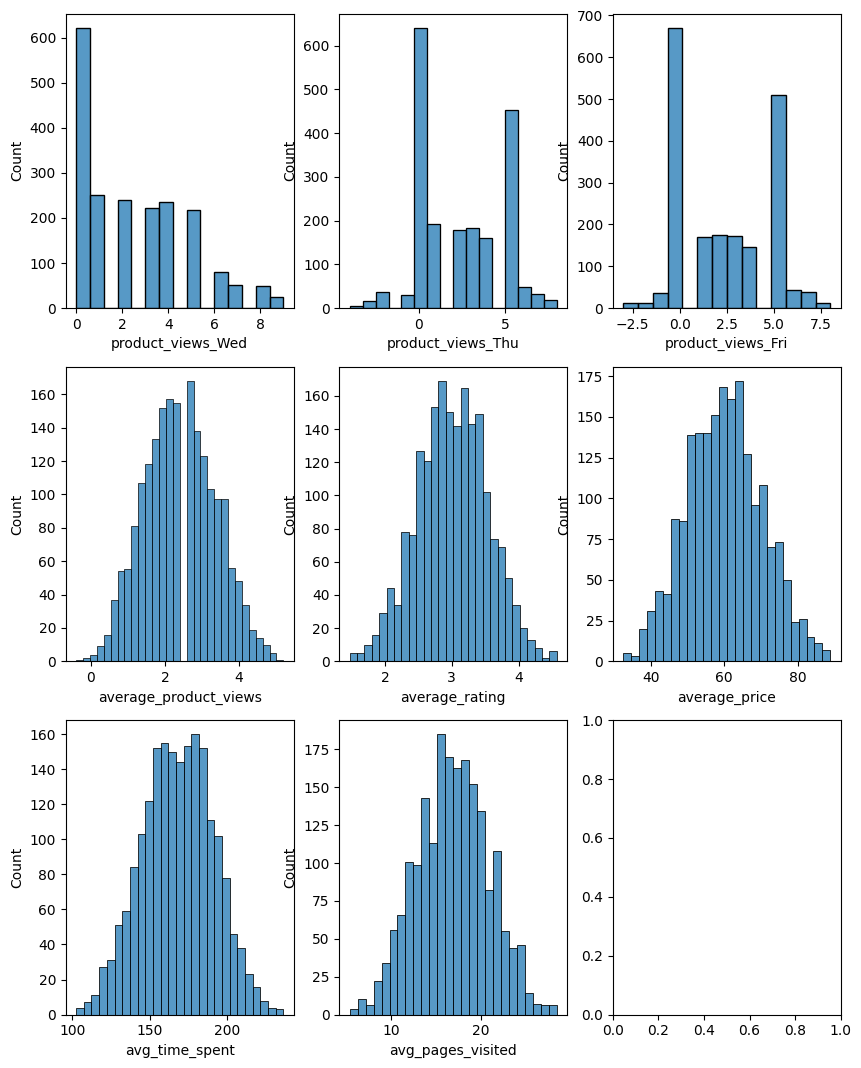

In [125]:
fig, axs=plt.subplots(3,3, figsize=(10,13))
plt1= sns.histplot(new_df['product_views_Wed'], ax=axs[0][0])
plt2= sns.histplot(new_df['product_views_Thu'], ax=axs[0][1])
plt3= sns.histplot(new_df['product_views_Fri'], ax=axs[0][2])
plt4= sns.histplot(new_df['average_product_views'], ax=axs[1][0])
plt5= sns.histplot(new_df['average_rating'], ax=axs[1][1])
plt6= sns.histplot(new_df['average_price'], ax=axs[1][2])
plt7= sns.histplot(new_df['avg_time_spent'], ax=axs[2][0])
plt8= sns.histplot(new_df['avg_pages_visited'], ax=axs[2][1])



In [137]:
new_df.columns

Index(['product_views_Wed', 'product_views_Thu', 'product_views_Fri',
       'average_product_views', 'average_rating', 'average_price',
       'avg_time_spent', 'avg_pages_visited', 'converted_Fri'],
      dtype='object')

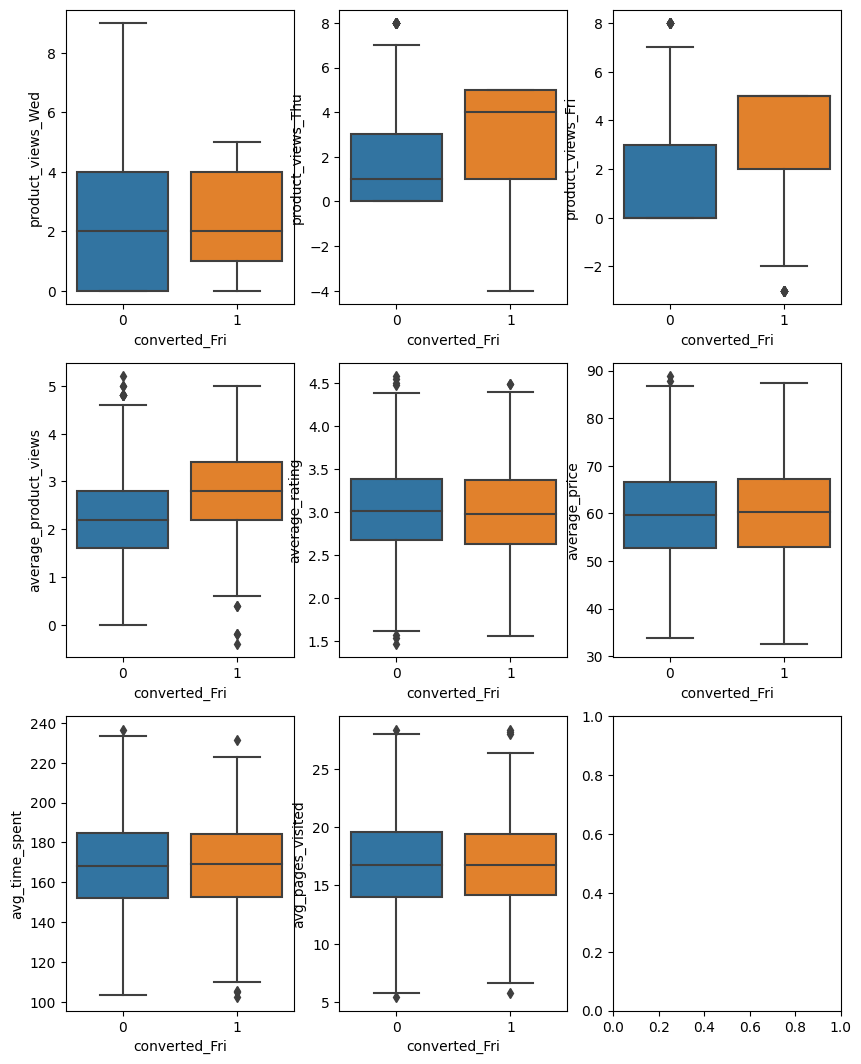

In [144]:
fig, axs=plt.subplots(3,3, figsize=(10,13))
plt1=sns.boxplot(x='converted_Fri', y='product_views_Wed',data=new_df, ax=axs[0][0])
plt2=sns.boxplot(x='converted_Fri', y='product_views_Thu',data=new_df, ax=axs[0][1])
plt3=sns.boxplot(x='converted_Fri',y='product_views_Fri', data=new_df, ax=axs[0][2])
plt4=sns.boxplot(x='converted_Fri' ,y='average_product_views',data=new_df, ax=axs[1][0])
plt5=sns.boxplot(x='converted_Fri',y='average_rating', data=new_df, ax=axs[1][1])
plt6=sns.boxplot(x='converted_Fri' ,y='average_price',data=new_df, ax=axs[1][2])
plt7=sns.boxplot(x='converted_Fri',y='avg_time_spent', data=new_df, ax=axs[2][0])
plt8=sns.boxplot(x='converted_Fri' ,y='avg_pages_visited',data=new_df, ax=axs[2][1])


**Intial Hypothesis** 
-- Product view on Wednesday,Thursday, Friday and average product view can be strong predictors of the target variable or conversion 


In [152]:
new_df

visitor_location marketing_channel gender  product_views_Wed   
0       North America           youtube      M                  2  \
1       South America           organic      F                  0   
2           Australia         instagram      M                  0   
3       North America          facebook      M                  0   
4                Asia         instagram      F                  2   
...               ...               ...    ...                ...   
1995           Europe           organic      F                  0   
1996    South America            google      M                  0   
1997             Asia          facebook      M                  0   
1998    South America           youtube      F                  2   
1999    North America         instagram      F                  1   

      product_views_Thu  product_views_Fri  average_product_views   
0                     1                  2                    2.8  \
1                     1                  5                    2.6   
2                    -3                  5                    1.8   
3                     5                  0                    1.2   
4                     2                  3                    2.6   
...                 ...                ...                    ...   
1995                  4                  2                    1.8   
1996                  4                  1                    1.6   
1997                  0                  8                    2.6   
1998                  5                  5                    3.2   
1999                  5                  1                    2.0   

      average_rating  average_price  avg_time_spent  avg_pages_visited   
0              3.134         54.738           170.4               19.2  \
1              2.068         71.432           125.2               24.4   
2              3.666         64.358           119.2                9.6   
3              3.300         56.048           154.8               21.2   
4              2.364         46.442           177.4               19.8   
...              ...            ...             ...                ...   
1995           3.008         57.260           154.8               19.4   
1996           1.858         45.702           197.6               21.2   
1997           3.280         52.544           143.6               16.8   
1998           3.662         51.752           144.2               14.6   
1999           2.924         59.608           154.2               19.2   

      converted_Fri  
0                 1  
1                 0  
2                 1  
3                 0  
4                 1  
...             ...  
1995              0  
1996              0  
1997              0  
1998              1  
1999              1  

[1994 rows x 12 columns]

In [151]:
new_df.groupby(['converted_Fri', 'gender'])['gender'].count().unstack()

gender           F    M
converted_Fri          
0              601  653
1              489  251

In [153]:
new_df.groupby(['converted_Fri', 'visitor_location'])['gender'].count().unstack()

visitor_location  Asia  Australia  Europe  North America  South America
converted_Fri                                                          
0                  231        268     235            266            254
1                  137        135     147            143            178

In [154]:
new_df.groupby(['converted_Fri','marketing_channel'])['gender'].count().unstack()

marketing_channel  facebook  google  instagram  organic  youtube
converted_Fri                                                   
0                       237     234        257      310      216
1                       156     165        172       95      152

In [155]:
new_df[new_df['converted_Fri']==1].describe(include='all')

visitor_location marketing_channel gender  product_views_Wed   
count               740               740    740         740.000000  \
unique                5                 5      2                NaN   
top       South America         instagram      F                NaN   
freq                178               172    489                NaN   
mean                NaN               NaN    NaN           2.466216   
std                 NaN               NaN    NaN           1.684184   
min                 NaN               NaN    NaN           0.000000   
25%                 NaN               NaN    NaN           1.000000   
50%                 NaN               NaN    NaN           2.000000   
75%                 NaN               NaN    NaN           4.000000   
max                 NaN               NaN    NaN           5.000000   

        product_views_Thu  product_views_Fri  average_product_views   
count          740.000000         740.000000             740.000000  \
unique                NaN                NaN                    NaN   
top                   NaN                NaN                    NaN   
freq                  NaN                NaN                    NaN   
mean             3.085135           3.548649               2.824324   
std              2.438315           2.149125               0.897540   
min             -4.000000          -3.000000              -0.400000   
25%              1.000000           2.000000               2.200000   
50%              4.000000           5.000000               2.800000   
75%              5.000000           5.000000               3.400000   
max              5.000000           5.000000               5.000000   

        average_rating  average_price  avg_time_spent  avg_pages_visited   
count       740.000000     740.000000      740.000000         740.000000  \
unique             NaN            NaN             NaN                NaN   
top                NaN            NaN             NaN                NaN   
freq               NaN            NaN             NaN                NaN   
mean          3.001422      60.352841      167.983514          16.816216   
std           0.525513      10.214179       22.886205           3.925663   
min           1.564000      32.574000      102.400000           5.800000   
25%           2.628500      52.914000      152.800000          14.200000   
50%           2.978000      60.361000      169.000000          16.800000   
75%           3.368000      67.243000      184.000000          19.400000   
max           4.484000      87.478000      231.400000          28.400000   

        converted_Fri  
count           740.0  
unique            NaN  
top               NaN  
freq              NaN  
mean              1.0  
std               0.0  
min               1.0  
25%               1.0  
50%               1.0  
75%               1.0  
max               1.0

In [156]:
new_df[new_df['converted_Fri']==0].describe(include='all')

visitor_location marketing_channel gender  product_views_Wed   
count              1254              1254   1254        1254.000000  \
unique                5                 5      2                NaN   
top           Australia           organic      M                NaN   
freq                268               310    653                NaN   
mean                NaN               NaN    NaN           2.433014   
std                 NaN               NaN    NaN           2.658221   
min                 NaN               NaN    NaN           0.000000   
25%                 NaN               NaN    NaN           0.000000   
50%                 NaN               NaN    NaN           2.000000   
75%                 NaN               NaN    NaN           4.000000   
max                 NaN               NaN    NaN           9.000000   

        product_views_Thu  product_views_Fri  average_product_views   
count         1254.000000        1254.000000            1254.000000  \
unique                NaN                NaN                    NaN   
top                   NaN                NaN                    NaN   
freq                  NaN                NaN                    NaN   
mean             1.766348           1.646730               2.160287   
std              2.185445           2.138184               0.918195   
min              0.000000           0.000000               0.000000   
25%              0.000000           0.000000               1.600000   
50%              1.000000           0.000000               2.200000   
75%              3.000000           3.000000               2.800000   
max              8.000000           8.000000               5.200000   

        average_rating  average_price  avg_time_spent  avg_pages_visited   
count      1254.000000    1254.000000     1254.000000        1254.000000  \
unique             NaN            NaN             NaN                NaN   
top                NaN            NaN             NaN                NaN   
freq               NaN            NaN             NaN                NaN   
mean          3.015041      59.907121      168.256140          16.858373   
std           0.522390      10.148662       23.378899           4.045839   
min           1.472000      33.832000      103.600000           5.400000   
25%           2.672000      52.632500      152.000000          14.000000   
50%           3.017000      59.651000      168.300000          16.800000   
75%           3.379500      66.556000      184.800000          19.600000   
max           4.574000      88.798000      236.600000          28.400000   

        converted_Fri  
count          1254.0  
unique            NaN  
top               NaN  
freq              NaN  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0